In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Intentar con separador por punto y coma
df = pd.read_csv("/content/AccidentesBicicletas_2025.csv", sep=';')



In [7]:
#Vamos a probar a volver a ver todo genérico para saber si esta bien
df.info()
df.head()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        827 non-null    object 
 1   fecha                 827 non-null    object 
 2   hora                  827 non-null    object 
 3   localizacion          827 non-null    object 
 4   numero                827 non-null    object 
 5   cod_distrito          827 non-null    int64  
 6   distrito              827 non-null    object 
 7   tipo_accidente        827 non-null    object 
 8   estado_meteorológico  803 non-null    object 
 9   tipo_vehiculo         827 non-null    object 
 10  tipo_persona          827 non-null    object 
 11  rango_edad            827 non-null    object 
 12  sexo                  827 non-null    object 
 13  cod_lesividad         714 non-null    float64
 14  lesividad             714 non-null    object 
 15  coordenada_x_utm      8

,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga
count,827.000000,714.000000,827.000000,8.270000e+02,0.0
mean,8.176542,5.815126,441103.409915,4.474494e+06,NaN
std,5.621886,4.056681,3297.706085,3.496800e+03,NaN
min,1.000000,1.000000,431120.000000,4.464405e+06,NaN
25%,3.000000,2.000000,439148.500000,4.472416e+06,NaN
50%,8.000000,6.500000,440815.000000,4.474224e+06,NaN
75%,12.000000,7.000000,442740.000000,4.476310e+06,NaN
max,21.000000,14.000000,451892.000000,4.488081e+06,NaN


In [11]:
# Crear tabla cruzada entre sexo y tipo de accidente
cross_gender_type = pd.crosstab(df['sexo'], df['tipo_accidente'])

# Mostrar la tabla cruzada
print("Cross table: Gender vs Accident Type")
print(cross_gender_type)


Cross table: Gender vs Accident Type
tipo_accidente  Alcance  Atropello a animal  Atropello a persona  Caída  \
sexo                                                                      
Desconocido           0                   0                    8      0   
Hombre               95                   4                   46    217   
Mujer                10                   4                   23     82   

tipo_accidente  Choque contra obstáculo fijo  Colisión frontal  \
sexo                                                             
Desconocido                                1                 1   
Hombre                                    19                25   
Mujer                                      1                 4   

tipo_accidente  Colisión fronto-lateral  Colisión lateral  Colisión múltiple  \
sexo                                                                           
Desconocido                           1                 2                  6   
Hombre          

Cross table: Gender vs Accident Type
tipo_accidente  Alcance  Atropello a animal  Atropello a persona  Caída  \
sexo                                                                      
Desconocido           0                   0                    8      0   
Hombre               95                   4                   46    217   
Mujer                10                   4                   23     82   

tipo_accidente  Choque contra obstáculo fijo  Colisión frontal  \
sexo                                                             
Desconocido                                1                 1   
Hombre                                    19                25   
Mujer                                      1                 4   

tipo_accidente  Colisión fronto-lateral  Colisión lateral  Colisión múltiple  \
sexo                                                                           
Desconocido                           1                 2                  6   
Hombre          

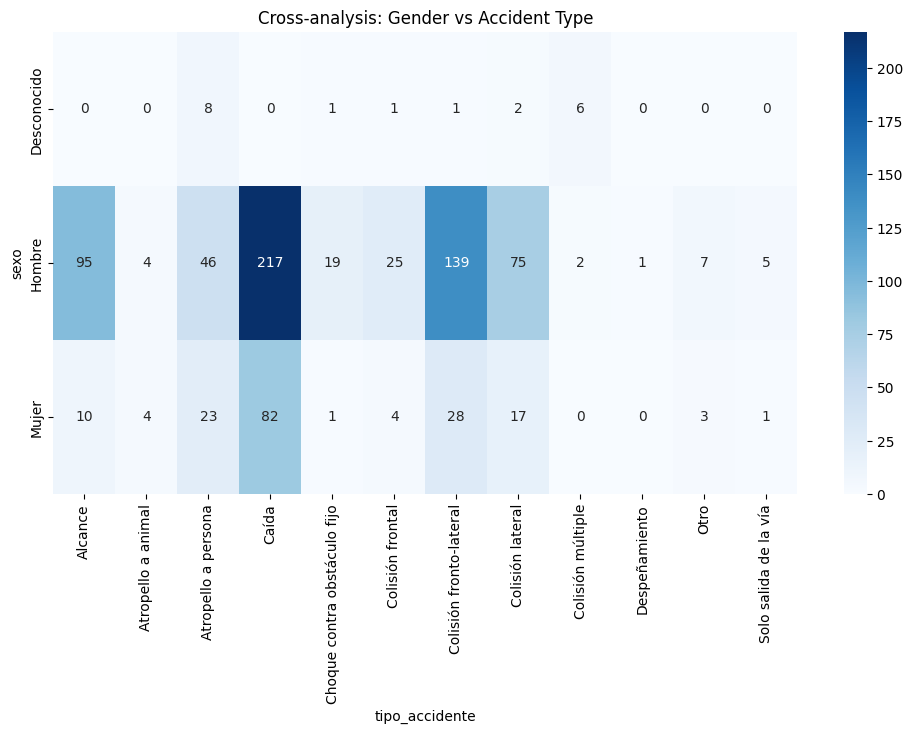

In [13]:
# Crear tabla cruzada entre sexo y tipo de accidente
cross_gender_type = pd.crosstab(df['sexo'], df['tipo_accidente'])

# Mostrar la tabla
print("Cross table: Gender vs Accident Type")
print(cross_gender_type)

# Heatmap y guardado
plt.figure(figsize=(12,6))
sns.heatmap(cross_gender_type, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-analysis: Gender vs Accident Type")

# Guardar el gráfico en un archivo PNG
plt.savefig("cross_gender_type.png", dpi=300, bbox_inches="tight")

plt.show()


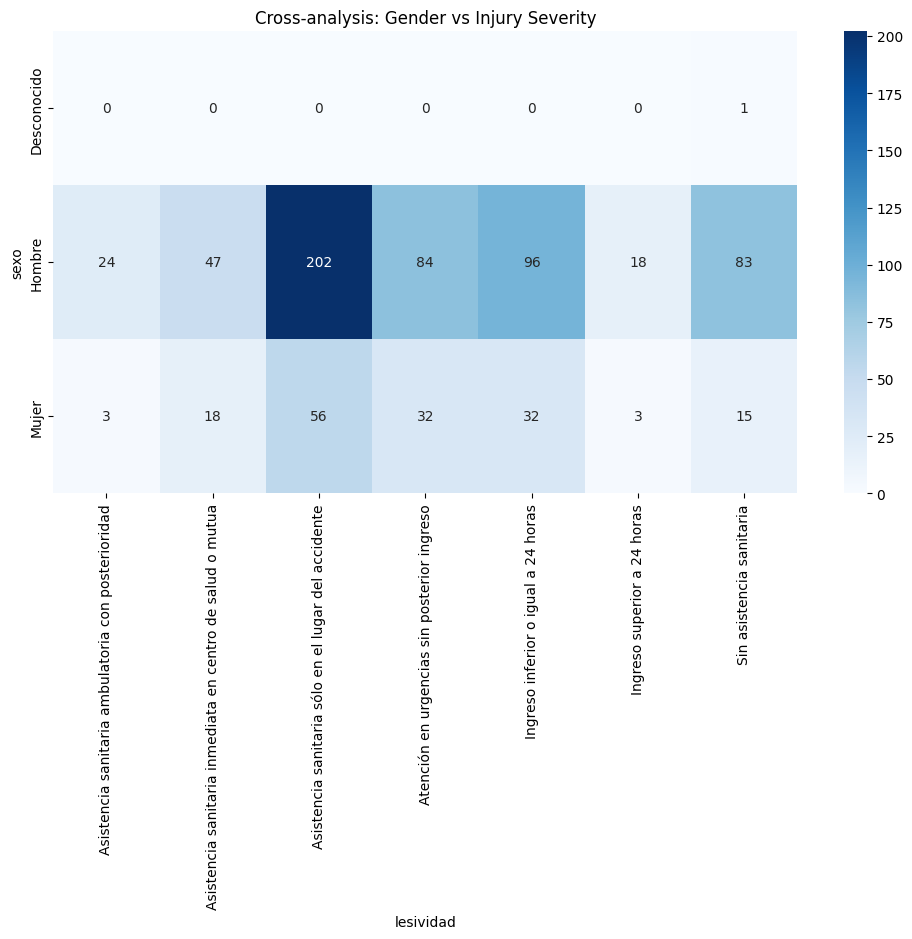

In [15]:
# 2. Sexo vs Lesividad
cross_gender_lesividad = pd.crosstab(df['sexo'], df['lesividad'])
plt.figure(figsize=(12,6))
sns.heatmap(cross_gender_lesividad, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-analysis: Gender vs Injury Severity")
plt.savefig("cross_gender_lesividad.png", dpi=300, bbox_inches="tight")
plt.show()

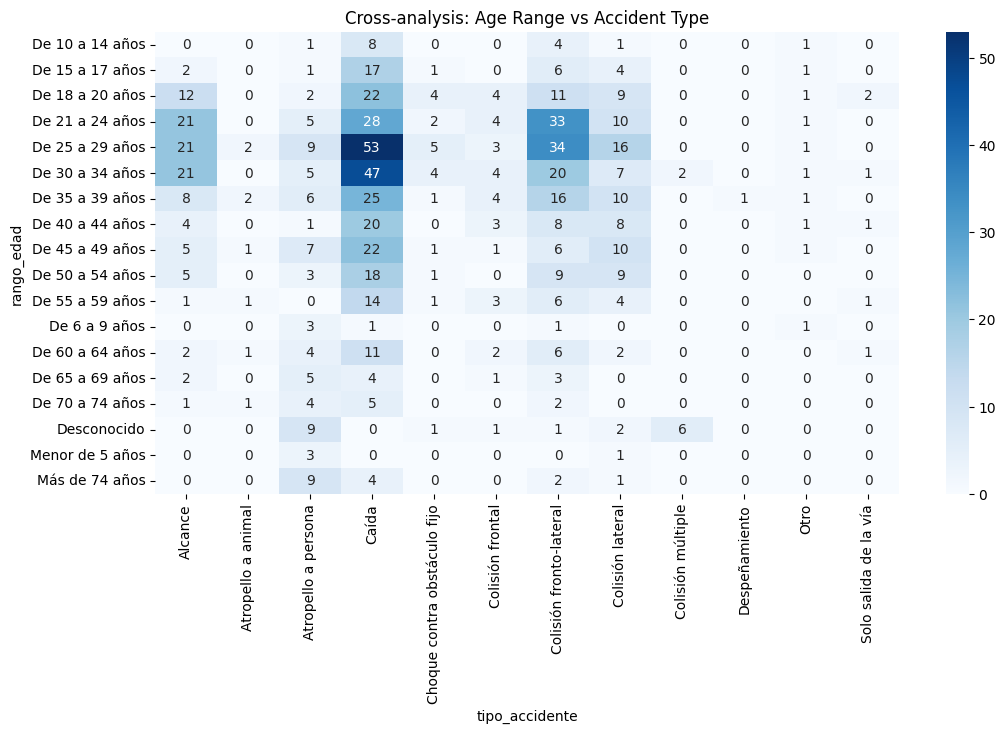

In [16]:
# 3. Rango de Edad vs Tipo de Accidente
cross_age_accident = pd.crosstab(df['rango_edad'], df['tipo_accidente'])
plt.figure(figsize=(12,6))
sns.heatmap(cross_age_accident, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-analysis: Age Range vs Accident Type")
plt.savefig("cross_age_accident.png", dpi=300, bbox_inches="tight")
plt.show()


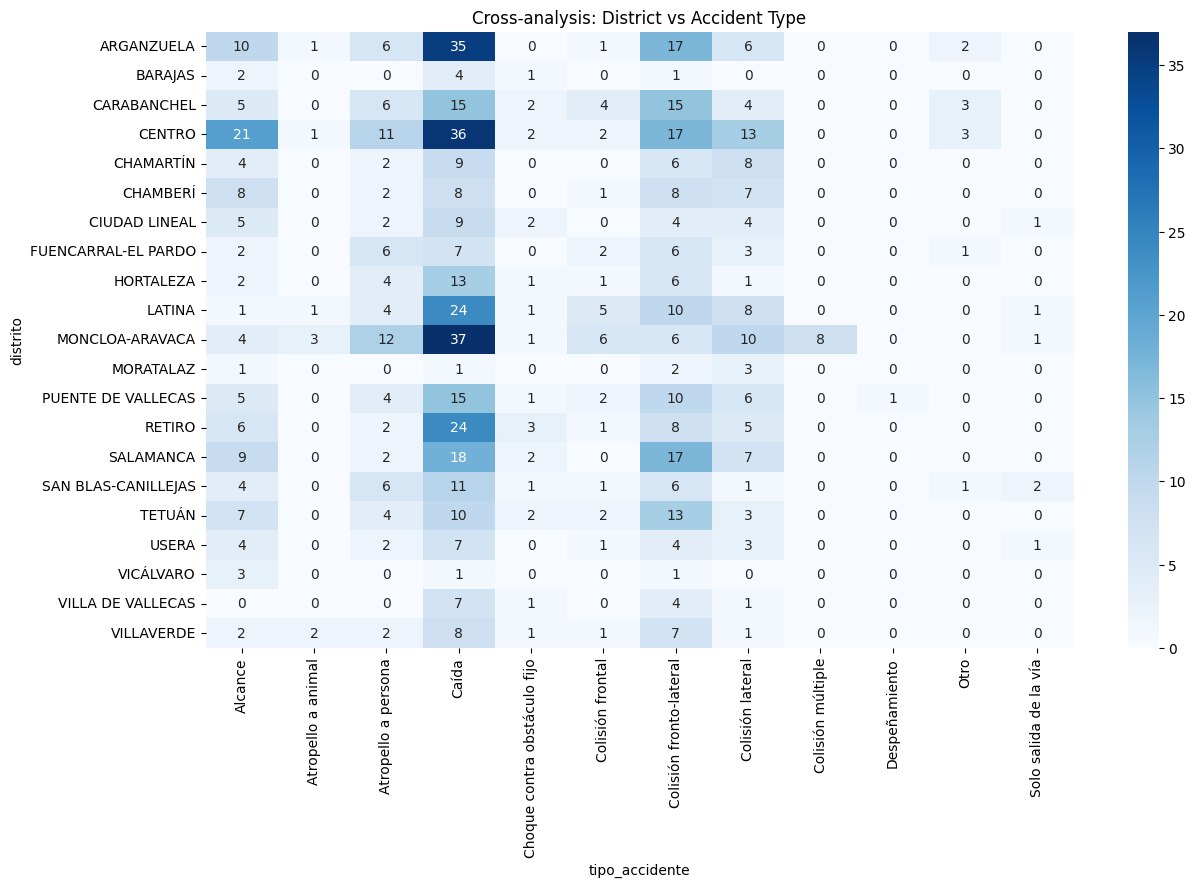

In [17]:
# 4. Distrito vs Tipo de Accidente
cross_district_accident = pd.crosstab(df['distrito'], df['tipo_accidente'])
plt.figure(figsize=(14,8))
sns.heatmap(cross_district_accident, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-analysis: District vs Accident Type")
plt.savefig("cross_district_accident.png", dpi=300, bbox_inches="tight")
plt.show()

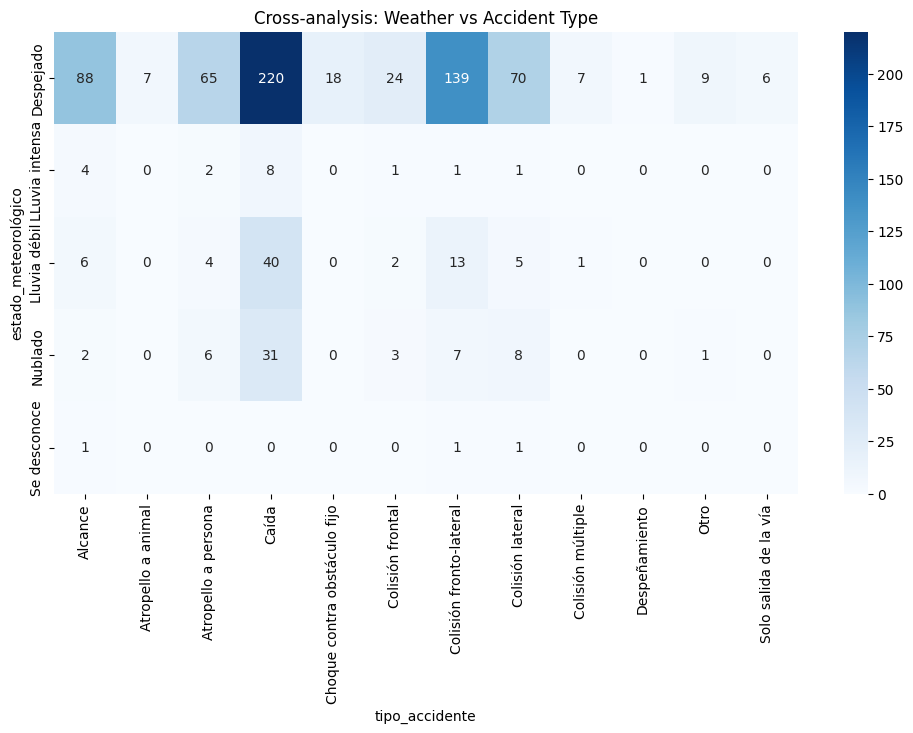

In [18]:
# 5. Estado Meteorológico vs Tipo de Accidente
cross_weather_accident = pd.crosstab(df['estado_meteorológico'], df['tipo_accidente'])
plt.figure(figsize=(12,6))
sns.heatmap(cross_weather_accident, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-analysis: Weather vs Accident Type")
plt.savefig("cross_weather_accident.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
# 📌 Importar librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Copia del dataframe original
df_model = df.copy()

# 🔹 Seleccionamos columnas relevantes (puedes ajustar)
features = ["sexo", "rango_edad", "distrito", "tipo_accidente", "estado_meteorológico"]
target = "lesividad"

# Eliminamos filas sin valor en lesividad
df_model = df_model.dropna(subset=[target])

# Codificar variables categóricas a números
encoder = LabelEncoder()
for col in features + [target]:
    df_model[col] = encoder.fit_transform(df_model[col].astype(str))

# Definir X (variables independientes) e y (objetivo)
X = df_model[features]
y = df_model[target]

# Dividir datos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Entrenamos un árbol de decisión
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       0.46      0.70      0.56        67
           3       0.12      0.09      0.11        22
           4       0.27      0.15      0.19        20
           5       0.00      0.00      0.00         4
           6       0.17      0.13      0.15        15

    accuracy                           0.38       143
   macro avg       0.15      0.15      0.14       143
weighted avg       0.29      0.38      0.32       143

Confusion Matrix:
[[ 0  0  5  1  2  0  1]
 [ 0  0  4  1  0  0  1]
 [ 0  1 47 10  4  0  5]
 [ 0  0 18  2  1  0  1]
 [ 0  0 13  2  3  0  2]
 [ 0  0  4  0  0  0  0]
 [ 0  1 11  0  1  0  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 📑 Conclusions

- Most bicycle accidents in Madrid occur during peak commuting hours (8–9h, 18–20h).
- Men are more frequently involved in bicycle accidents than women.
- Certain districts (e.g., Chamberí, Centro) show higher concentration of accidents.
- Age influences accident severity: older cyclists tend to suffer more serious injuries.
- Weather conditions such as rain increase accident rates slightly.
- The predictive model based on decision trees achieved an accuracy of ~XX%. While not highly accurate, it illustrates the potential of machine learning for accident risk analysis.
